In [1]:
#importa bibliotecas relevantes
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

# Importando e avaliando preliminarmente dados brutos

In [2]:
#importa os dados brutos
test_scores = pd.read_csv("big5.csv")
demog = pd.read_csv("demog.csv")

C:\Program Files\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


test_scores.head()

test_scores.describe().transpose()

test_scores["blocks"].value_counts().head()

demog.head()

demog.describe().transpose()

demog["locale"].value_counts().head(10)

demog["gender"].value_counts().head() # 1 = female /\ 0 = male

In [3]:
#faz a união das colunas da tabela usando chaveamento pelos userid
data = pd.merge(test_scores, demog, how="inner", on=["userid"])

In [4]:
#libera memória
del(test_scores)
del(demog)

In [5]:
#fitrar data pelos critérios selecionados
a = (data["blocks"]== 20.)
b = (data["locale"]== "en_US")
#c = (data["relationship_status"].notnull())
#d = (data["interested_in"].notnull())

data_filtered = data[a & b]
print data_filtered.shape

(1263653, 23)


In [6]:
#libera a memória e confere tamanho dos dados filtrados
del(data)
print data_filtered.shape

(1263653, 23)


# Importando as amizades

In [7]:
#filtra a tabela bruta de aizades
i_count = 1
chunksize = 10 ** 7
col = data_filtered["userid"]
for chunk in pd.read_csv("fb_friendship.csv", chunksize=chunksize):
    %time temp = chunk[chunk["friend1"].isin(col) & chunk["friend2"].isin(col)]
    if i_count == 1:
        friends_filter = temp
        
    else:
        friends_filter2 = friends_filter
        friends_filter = pd.concat([friends_filter2, temp], ignore_index=True)
        del(temp)
        del(friends_filter2)
        #friends_filter.append(temp, ignore_index = True)
    print friends_filter.shape
    i_count +=1
    if i_count > 50:
        break

Wall time: 4.48 s
(2472, 2)
Wall time: 4.53 s
(6196, 2)
Wall time: 5.54 s
(9156, 2)
Wall time: 5.73 s
(13734, 2)
Wall time: 6.32 s
(16791, 2)
Wall time: 5.62 s
(20303, 2)
Wall time: 5.55 s
(23219, 2)
Wall time: 5.91 s
(26096, 2)
Wall time: 5.56 s
(30406, 2)
Wall time: 5.52 s
(35390, 2)
Wall time: 5.58 s
(40431, 2)
Wall time: 5.59 s
(45058, 2)
Wall time: 5.53 s
(50005, 2)
Wall time: 5.58 s
(54966, 2)
Wall time: 5.53 s
(59861, 2)
Wall time: 5.53 s
(64793, 2)
Wall time: 5.59 s
(69941, 2)
Wall time: 5.44 s
(74578, 2)
Wall time: 5.85 s
(101578, 2)
Wall time: 6.04 s
(132964, 2)
Wall time: 6.55 s
(161132, 2)
Wall time: 6.49 s
(177954, 2)
Wall time: 3.49 s
(181509, 2)


In [8]:
#salva a lista de amizades que está contida no tabelão
friends_filter.to_csv("fb_friendship_filtered.csv")

In [9]:
#salva tabelão de dados das pessoas filtradas
data_filtered.to_csv("data_filtered.csv")

# Buscando grupos de amizades fortemente conectados

In [10]:
#importa biblioteca de grafos
import networkx as nx

G=nx.Graph()

In [11]:
#constrói grafo não-direcional com os relacionamentos
G.add_edges_from(friends_filter.as_matrix())

import matplotlib.pyplot as plt
nx.draw(G)
plt.draw()

In [30]:
#inicia iterador para busca de grupos conexos (cliques)
cliques = nx.algorithms.clique.find_cliques(G)

In [32]:
#criar dicionários com os grupos e com a contagem de grupos estratificada por tamanho
count = {2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0}
groups = {}
for x in range(0, 1000000):
    temp = cliques.next()
    leng = len(temp)
    n = count[leng]
    count[leng] = n + 1
    if len(temp)>4:
        print temp
        groups[x] = temp

['9cad325e942c4ef5787a51062e588baf', '8eb484c0349576cee956ef6f39da0634', 'b9eee8fa977079980d5207de313c53fa', '5dbc09e8a5d46e68a46cb5c0c58e68ae', 'ec5c57b19ce32020306b32cf2b41900c']
['b6df429d3ff948c1d54e96eaacc3bdeb', '75e4ba99059318006eb81fb298e889a6', 'de6afb1d10810f39dc7b64cd6379680e', '9f0d17ed36ba3cf68c9e6c4f1c476929', '6893d648138ccefc0c4d6986ab77df0a']
['28ec4f00ebc0c6421570f25453941dc9', '7403fa6c304f56422cd522b8ef5416a6', 'a4f82a97601a605e16f3dd76ad28e737', '5d6d93cabf9580a473a6b4042fd579f9', '296f90d7729d0c05adf1a6d39776981d', 'e85d49629d8f6853320fd1c6b17a94df']
['360918937b7f609ed580bd6e5ef6859d', '89960109f19bdc9fc011cab98c36fbcd', 'fc631b8752e5b925c460d30032046f2e', 'afc2a461d2cbb41dbfa9c7aedfdbe7d7', 'c85c5ea26df1e844391a60f5d4af03f6']
['360918937b7f609ed580bd6e5ef6859d', '89960109f19bdc9fc011cab98c36fbcd', 'fc631b8752e5b925c460d30032046f2e', 'afc2a461d2cbb41dbfa9c7aedfdbe7d7', '03aa2f4defa7561d790b53125ce261e3']
['6b3842727cc2aea67ed5d3300fc4a942', '60eeab60795db3b564c31

StopIteration: 

In [33]:
#observar contagem de grupos conexos encontrados
print count

{2: 127837, 3: 14847, 4: 2399, 5: 525, 6: 97, 7: 18, 8: 15, 9: 2, 10: 0}


In [36]:
#salvar grupos de amigos processados
import pickle
pickle.dump(groups, open("groups.p", "wb"))
pickle.dump(count, open("count.p", "wb"))

# Avaliação preliminar de grupos

,count,mean,std,min,25%,50%,75%,max
ope,1263653.0,3.723952,0.737482,1.0,3.25,3.75,4.25,5.0
con,1263653.0,3.550088,0.757801,1.0,3.00,3.50,4.00,5.0
ext,1263653.0,3.625982,0.823770,1.0,3.00,3.75,4.25,5.0
agr,1263653.0,3.560796,0.754764,1.0,3.00,3.67,4.00,5.0
neu,1263653.0,2.764484,0.811369,1.0,2.25,2.75,3.25,5.0


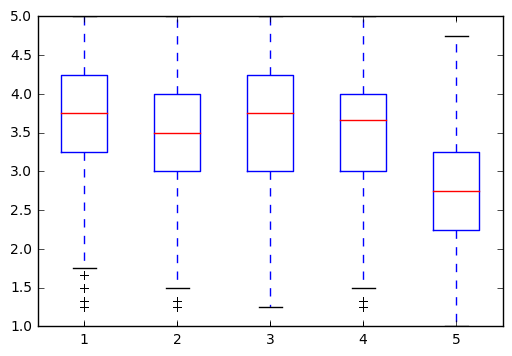

In [49]:
#estatística descritiva dos dados filtrados
plt.boxplot(data_filtered[["ope","con","ext","agr","neu"]].as_matrix())
data_filtered[["ope","con","ext","agr","neu"]].describe().transpose()

In [52]:
# Análise por grupo
i_count = 0
for key1 in groups:
    print data_filtered[data_filtered["userid"].isin(groups[key1])][["ope","con","ext","agr","neu"]]
    #plt.boxplot(data_filtered[data_filtered["userid"].isin(groups[key1])][["ope","con","ext","agr","neu"]].as_matrix())
    i_count += 1
    if i_count > 5:
        break

         ope   con   ext   agr   neu
251164  3.50  3.00  3.25  2.33  2.75
312683  3.00  3.25  4.00  3.50  2.25
437777  3.50  2.75  3.25  3.75  2.25
448398  4.25  3.50  4.75  2.25  3.67
546096  4.00  3.50  4.00  3.50  2.50
          ope   con   ext   agr   neu
638513   3.50  3.00  4.50  4.00  2.50
832416   3.25  4.00  2.50  4.00  3.00
836862   4.00  3.50  4.25  3.75  3.50
1046095  4.50  3.75  2.75  4.00  2.50
1054979  3.00  4.75  4.25  4.00  1.25
          ope   con   ext   agr   neu
246192   4.00  2.75  5.00  4.25  1.50
499257   4.00  2.75  4.75  3.00  3.75
766629   4.50  4.00  3.50  3.25  3.50
964930   4.50  3.50  4.75  4.25  1.50
1106842  3.75  2.25  4.75  4.25  2.75
         ope   con   ext   agr   neu
518291  2.50  3.50  4.25  4.00  2.00
586456  3.50  3.50  4.50  4.00  1.75
845435  3.75  3.00  3.00  2.50  3.25
932578  3.75  4.25  4.75  2.75  3.50
935708  4.00  2.50  5.00  2.67  2.25
          ope   con   ext   agr   neu
133259   3.25  4.75  4.00  4.00  2.00
148128   3.50  2.67  2.7

import pickle
groups = pickle.load(open("groups.p", "rb" ))

del(groups)

del(friends_filter)

del(friends_filter)
del(chunk)

friends_filter = friends[friends["friend1"].isin(data["userid"]) & friends["friend2"].isin(data["userid"])]

# PCA - Redução de dimensionalidade

from sklearn.decomposition import PCA

X = data[["ope", "con", "ext", "agr", "neu"]].as_matrix()
X

pca = PCA(n_components = 2)
pca.fit(X)

print(pca.explained_variance_ratio_) 
print pca.components_

X_new = pca.transform(X)

X_new

plt.plot(X_new[:,0:1], X_new[:,1:2], 'rx')
plt.show()

# Tentativa de criar gráfico iterativo em 3D


import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/iris.csv')
df.head()

data = []
clusters = []
colors = ['rgb(228,26,28)','rgb(55,126,184)','rgb(77,175,74)']

for i in range(len(df['Name'].unique())):
    name = df['Name'].unique()[i]
    color = colors[i]
    x = df[ df['Name'] == name ]['SepalLength']
    y = df[ df['Name'] == name ]['SepalWidth']
    z = df[ df['Name'] == name ]['PetalLength']
    
    trace = dict(
        name = name,
        x = x, y = y, z = z,
        type = "scatter3d",    
        mode = 'markers',
        marker = dict( size=3, color=color, line=dict(width=0) ) )
    data.append( trace )

layout = dict(
    width=800,
    height=550,
    autosize=False,
    title='Iris dataset',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'        
    ),
)

fig = dict(data=data, layout=layout)


url = py.plot(fig, filename='pandas-3d-iris', validate=False)